<a href="https://colab.research.google.com/github/LeeJeaHyuk/2021-2022-study/blob/main/2022datascience/hongong_fish_market_Polynomial_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf

In [2]:
import os

In [3]:
os.environ['KAGGLE_USERNAME'] ='leejeahyuk'
os.environ['KAGGLE_KEY'] ='909dc28f843ffc03b80b5291757fd8f0'

In [4]:
!kaggle datasets download -d aungpyaeap/fish-market
!unzip '*.zip'

  0% 0.00/2.39k [00:00<?, ?B/s]
100% 2.39k/2.39k [00:00<00:00, 1.58MB/s]
Archive:  fish-market.zip
  inflating: Fish.csv                


In [5]:
!ls

Fish.csv  fish-market.zip  sample_data


In [6]:
df = pd.read_csv('Fish.csv')

In [7]:
y=df['Species']
X=df.drop('Species', axis=1)

# 정규화

In [8]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

In [9]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
y = encoder.fit_transform(y)
y_mapping = {index: label for index, label in enumerate(encoder.classes_)}

In [ ]:
y_mapping
# 수치형으로 변환

{0: 'Bream',
 1: 'Parkki',
 2: 'Perch',
 3: 'Pike',
 4: 'Roach',
 5: 'Smelt',
 6: 'Whitefish'}

# 훈련 데이터 나누기

In [10]:
from sklearn.model_selection import train_test_split
train_input,  test_input, train_target, test_target = train_test_split(X, y, test_size=0.3, random_state=42)

# 다중 회귀

In [20]:
from sklearn.preprocessing import PolynomialFeatures

poly_features = PolynomialFeatures(degree=5, include_bias=False)
poly_features.fit(train_input)
train_poly = poly_features.transform(train_input)
test_poly = poly_features.transform(test_input)

## 특성 개수

In [21]:
poly_features.get_feature_names_out()

array(['Weight', 'Length1', 'Length2', 'Length3', 'Height', 'Width',
       'Weight^2', 'Weight Length1', 'Weight Length2', 'Weight Length3',
       'Weight Height', 'Weight Width', 'Length1^2', 'Length1 Length2',
       'Length1 Length3', 'Length1 Height', 'Length1 Width', 'Length2^2',
       'Length2 Length3', 'Length2 Height', 'Length2 Width', 'Length3^2',
       'Length3 Height', 'Length3 Width', 'Height^2', 'Height Width',
       'Width^2', 'Weight^3', 'Weight^2 Length1', 'Weight^2 Length2',
       'Weight^2 Length3', 'Weight^2 Height', 'Weight^2 Width',
       'Weight Length1^2', 'Weight Length1 Length2',
       'Weight Length1 Length3', 'Weight Length1 Height',
       'Weight Length1 Width', 'Weight Length2^2',
       'Weight Length2 Length3', 'Weight Length2 Height',
       'Weight Length2 Width', 'Weight Length3^2',
       'Weight Length3 Height', 'Weight Length3 Width', 'Weight Height^2',
       'Weight Height Width', 'Weight Width^2', 'Length1^3',
       'Length1^2 Length2',

## 모델 훈련

In [22]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(max_iter=1000)

lr.fit(train_poly, train_target)
print(lr.score(train_poly, train_target))

0.9369369369369369


In [23]:
print(lr.score(test_poly, test_target))

0.9166666666666666


# 규제

## 릿지

In [24]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
ss.fit(train_poly)

train_scaled = ss.transform(train_poly)
test_scaled = ss.transform(test_poly)

In [25]:
from sklearn.linear_model import Ridge

ridge = Ridge()
ridge.fit(train_scaled, train_target)
print(ridge.score(train_scaled, train_target))

0.7687811119800768


In [26]:
print(ridge.score(test_scaled, test_target))

0.7050343160772852


In [27]:
import matplotlib.pyplot as plt

train_score = []
test_score = []

In [28]:
alpha_list = [0.001, 0.01, 0.1, 1, 10, 100]
for alpha in alpha_list:
    # 릿지 모델을 만듭니다
    ridge = Ridge(alpha=alpha)
    # 릿지 모델을 훈련합니다
    ridge.fit(train_scaled, train_target)
    # 훈련 점수와 테스트 점수를 저장합니다
    train_score.append(ridge.score(train_scaled, train_target))
    test_score.append(ridge.score(test_scaled, test_target))

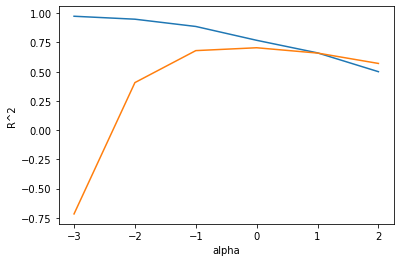

In [29]:
plt.plot(np.log10(alpha_list), train_score)
plt.plot(np.log10(alpha_list), test_score)
plt.xlabel('alpha')
plt.ylabel('R^2')
plt.show()

In [30]:
ridge = Ridge(alpha=0.1)
ridge.fit(train_scaled, train_target)

print(ridge.score(train_scaled, train_target))
print(ridge.score(test_scaled, test_target))

0.8872235380891996
0.680523394938029


# 라쏘

In [31]:
from sklearn.linear_model import Lasso

lasso = Lasso()
lasso.fit(train_scaled, train_target)
print(lasso.score(train_scaled, train_target))

0.07739589323303164


In [32]:
print(lasso.score(test_scaled, test_target))

0.083669763955044


In [33]:
train_score = []
test_score = []

alpha_list = [0.001, 0.01, 0.1, 1, 10, 100]
for alpha in alpha_list:
    # 라쏘 모델을 만듭니다
    lasso = Lasso(alpha=alpha, max_iter=10000)
    # 라쏘 모델을 훈련합니다
    lasso.fit(train_scaled, train_target)
    # 훈련 점수와 테스트 점수를 저장합니다
    train_score.append(lasso.score(train_scaled, train_target))
    test_score.append(lasso.score(test_scaled, test_target))

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.022e+00, tolerance: 2.849e-02
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


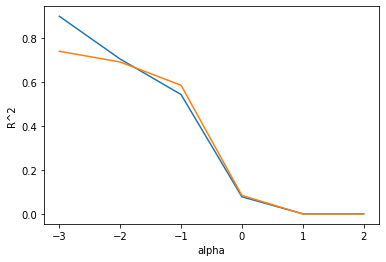

In [34]:
plt.plot(np.log10(alpha_list), train_score)
plt.plot(np.log10(alpha_list), test_score)
plt.xlabel('alpha')
plt.ylabel('R^2')
plt.show()

In [35]:
print(np.sum(lasso.coef_ == 0))

461
